# Import neccessary modules


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Validation

In [3]:
prod_sales = pd.read_csv("product_sales.csv")
prod_sales['sales_method'] = prod_sales['sales_method'].str.lower()
prod_sales['sales_method'] = prod_sales['sales_method'].replace({'em + call': 'email + call'})
prod_sales['sales_method'] = prod_sales['sales_method'].astype('category')
prod_sales['revenue'] = prod_sales.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.mean()))

prod_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            15000 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 835.2+ KB


The dataset contains 15,000 rows and 8 columns before cleaning and validation. I have cleaned and validated all the columns against the criteria in the dataset info table: 
1. week: numeric values without missing values, same as the description. No cleaning is needed.
2. sales_method: it had **5 unique values** instead of **3 values**. After cleaning, the unique values are **now 3**. Also the data type was converted from **"string"** to **"category"** type. 
3. customer_id: character values without missing values, same as the description. No cleaning is needed.
4. nb_sold: numeric values without missing values, same as the description. No cleaning is needed.
5. revenue: 1,074 missing values before cleaning. After cleaning, the missing values were replaced with the average revenue value of each 'sale_method' group. The data type is the same as the criteria. 
6. years_as_customer: numeric values without missing values, same as the description. No cleaning is needed.
7. nb_site_visits: numeric values without missing values, same as the description. No cleaning is needed.
8. state: character values without missing values, same as the description. No cleaning is needed.

After the data cleaning and validation, the dataset contains **15,000 columns and 8 columns** with **no missing values**.

# Exploratory Data Analysis

## How many customers were there for each approach?

As can be observed from the figure, the **'email' approach** yielded the **highest customer count** with about **50%** of the customer conversion while the 'call' approach has about 33% and the 'email + call' approach with 17%.

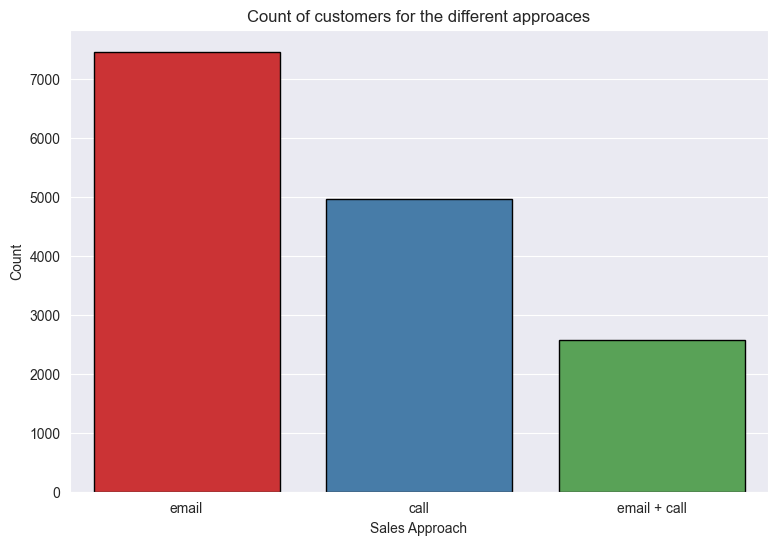

In [5]:
# cust_per_method = prod_sales.groupby('sales_method').agg({'customer_id': 'count'}).reset_index()
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
ax1 = sns.countplot(x='sales_method', data= prod_sales, order=prod_sales['sales_method'].value_counts().index, palette= "Set1", edgecolor="black")
ax1.set(xlabel="Sales Approach", ylabel="Count", title="Count of customers for the different approaces")
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000])
plt.show()

## Spread of the Revenue overall.

As can be observed from the boxplot below, a large chunk of the revenue range **lies between about 53 and 108**. Revenues more than 190 could be considered outliers.

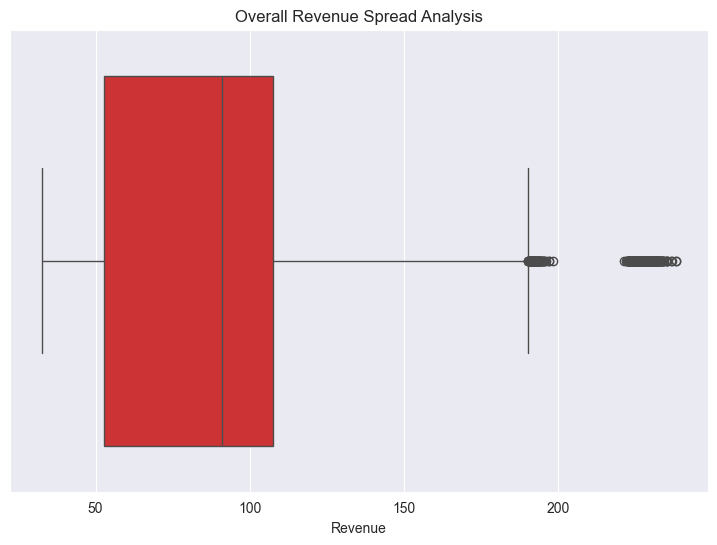

In [6]:

plt.figure(figsize=(9, 6))
sns.boxplot(x='revenue', data=prod_sales, palette="Set1")
plt.title('Overall Revenue Spread Analysis')
plt.xlabel('Revenue')
plt.show()

## Spread of the Revenue for each method.

From the multiple boxplots shown below, the **'email + call' approach has the highest median revenue** followed by the 'email' approach. The significant amount of revenue of the 'email + call' approach lies **between about 176 and 190.** while that of the 'email' approach lies between **88 and 104**.

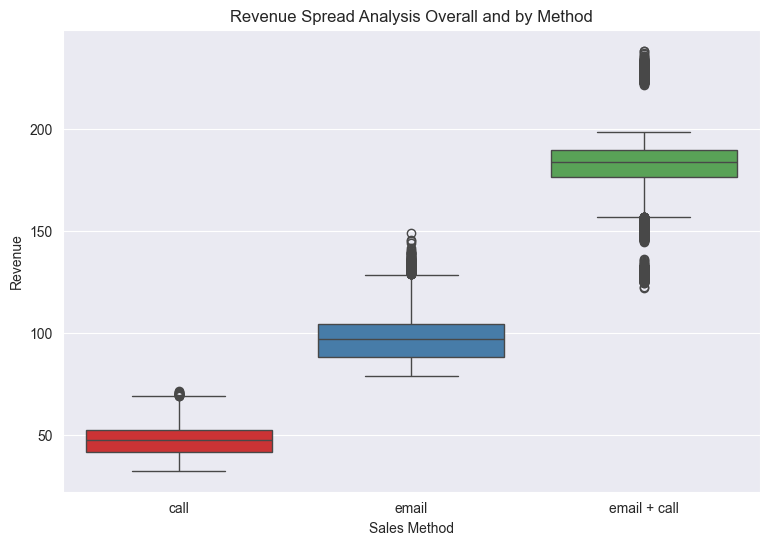

In [7]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='sales_method', y='revenue', data=prod_sales, palette="Set1")  # Set showfliers to True if you want to include outliers
plt.title('Revenue Spread Analysis Overall and by Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

## Was there any difference in the revenue over time for each of the methods?

Answering this question will give us an idea of the trend in the revenue for each method. As can be observed from the plot below, all the approaches have an upward trend of revenue over the 6-week period with the 'email + call' and 'email' methods having the steepest upward trends in trend. This means the revenue growths over the 6-week period since the launch has been upward. 


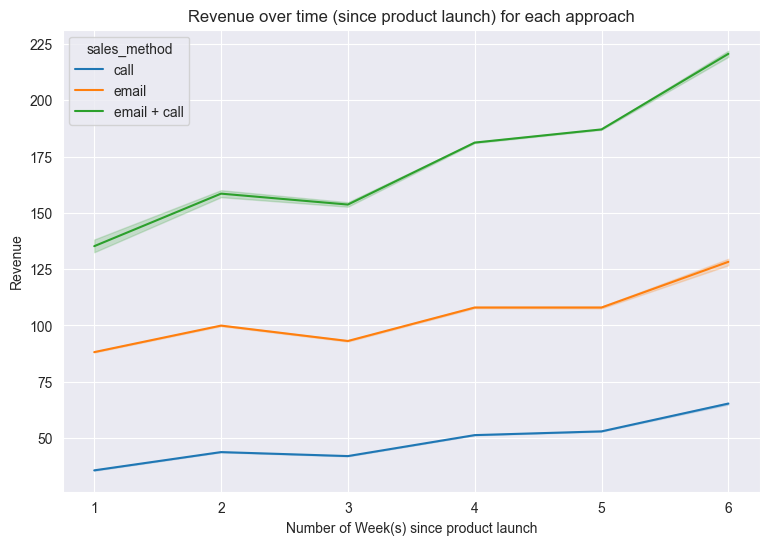

In [8]:
plt.figure(figsize=(9, 6))
sns.lineplot(x='week', y='revenue', data=prod_sales, hue='sales_method')
plt.xlabel("Number of Week(s) since product launch")
plt.ylabel("Revenue")
plt.title("Revenue over time (since product launch) for each approach")
plt.show()

# Which method to use?
To determine the method to use, the previous analyses and the following analyses are considered. The following analyses seek to answer the question: **Are there any other differences between the customers in each group?** Four (4) differences are considered below:

## 1. Total site visits for each approach

The total site visits over the last 6 months for the **'email' approach is significantly higher** than the others - **about 49%** of the total site visits - with the next higher being the 'call' approach - about 32%. This shows a much significant conversion rate with more customers visitng sites for the 'email' approach. 

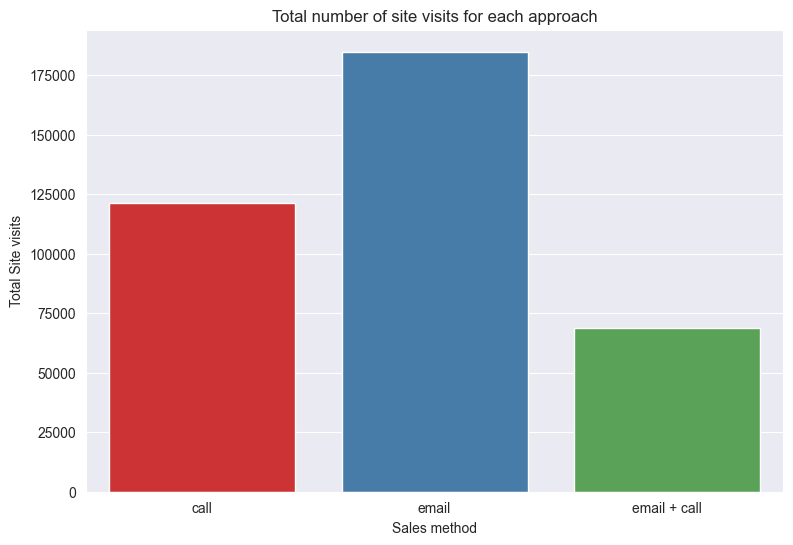

In [9]:
total_prod_sales = prod_sales.groupby('sales_method').agg({'nb_site_visits': 'sum', 'nb_sold': 'sum', 'years_as_customer': 'sum', 'revenue': 'sum'}).reset_index()
plt.figure(figsize=(9,6))
sns.barplot(x="sales_method", y="nb_site_visits", data=total_prod_sales, palette="Set1")
plt.xlabel("Sales method")
plt.ylabel("Total Site visits")
plt.title("Total number of site visits for each approach")
plt.show()


## 2. Total number of new products sold for each approach
As seen from the figure, the **'email'** approach has the **highest** total number of new products sold (being **about 48% of the total**). The 'call' approach comes next being about 31% of the total. This difference is very significant. 

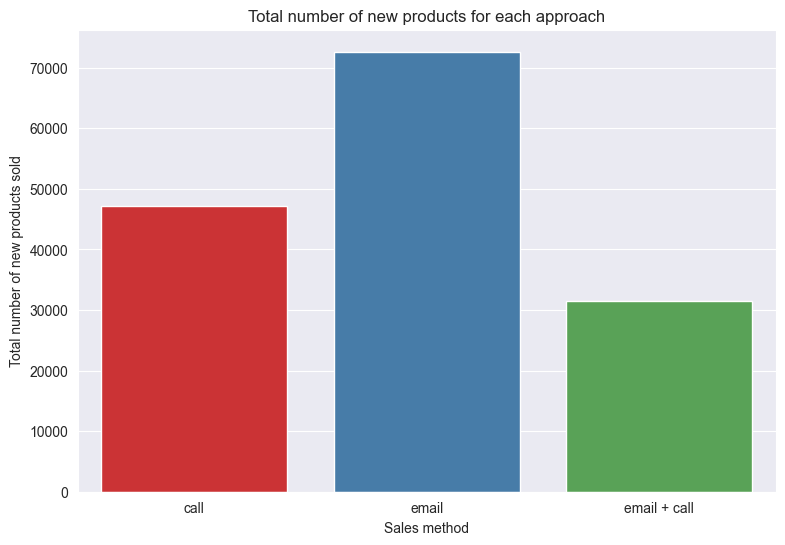

In [10]:
plt.figure(figsize=(9,6))
sns.barplot(x="sales_method", y="nb_sold", data=total_prod_sales, palette="Set1")
plt.xlabel("Sales method")
plt.ylabel("Total number of new products sold")
plt.title("Total number of new products for each approach")
plt.show()

## 3. Is there a relationship between the Customer Tenure and the Revenue generated?

The Customer tenure refers to the duration or length of time a customer has been consistently purchasing products or services from a specific company. From the plot, there is **no strong correlation between Revenue and Customer Tenure**. The customer Tenure of customers from the 'email' and the 'email + call' method are very similar while it is just a little less for the 'call' approach. 

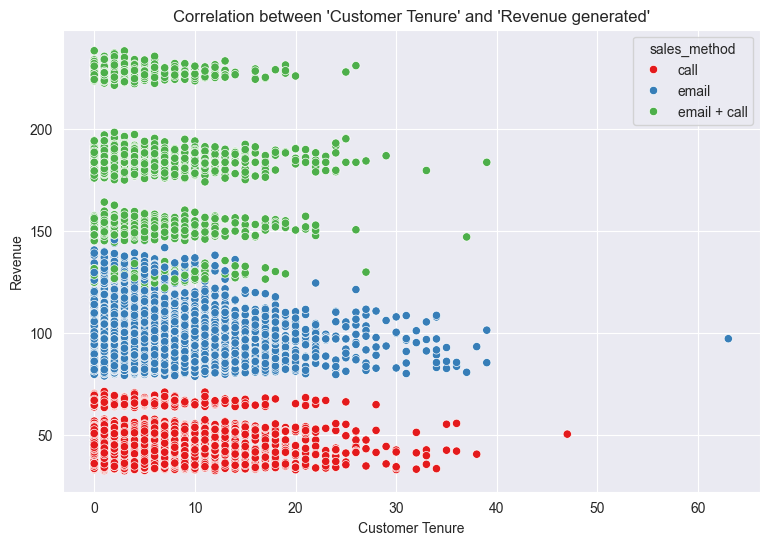

In [11]:
plt.figure(figsize=(9,6))
sns.scatterplot(y="revenue", x="years_as_customer", data=prod_sales, hue="sales_method", palette="Set1")
plt.xlabel("Customer Tenure")
plt.ylabel("Revenue")
plt.title("Correlation between 'Customer Tenure' and 'Revenue generated'")
plt.show()

## 4. Total revenue generated for each approach is important.
The total revenue for each approach is considered in the figure below. The figure shows the **'email'** approach is significantly the **highest** of the three (3) being about **51% of the total revenue** generated while the 'email + call' approach records the second highest (being about 33%). This shows the 'email' approach yields a **significantly higher revenue.** 

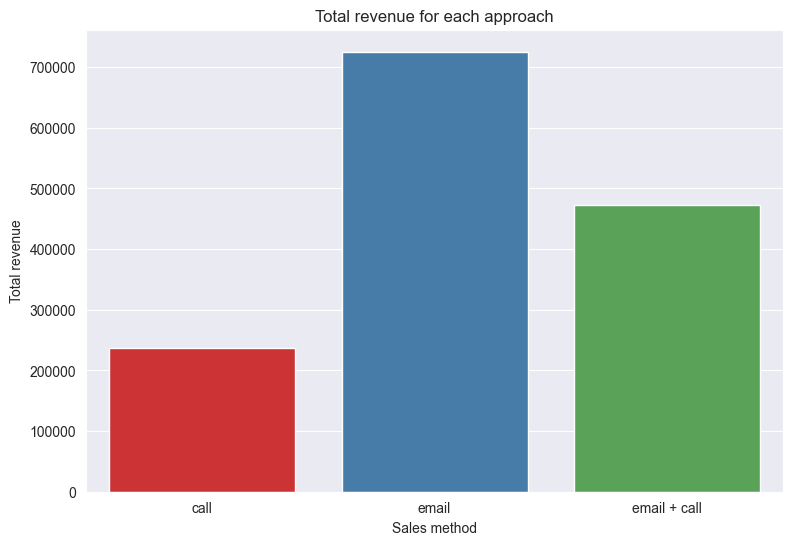

In [12]:
plt.figure(figsize=(9,6))
sns.barplot(x="sales_method", y="revenue", data=total_prod_sales, palette="Set1")
plt.xlabel("Sales method")
plt.ylabel("Total revenue")
plt.title("Total revenue for each approach")
plt.show()

## The Winner!
From the above analyses, the **winner is the 'email' approach**. I would recommend this approach for the following reasons: 
1. The **total number of customers** converted is **significantly higher** than the other two approaches. 
2. The **total revenue generated** by the 'email' approach is significantly higher than the other approaches. 
3. The time spent per customer using the 'email' approach requires 'little work' while the time spent per customer for the 'email + call' approach is roughly about 10 minutes and about 30 minutes for the 'call' approach. This time spent multiplied would lead to hours of work spent.

## Business Metric
Since our goal is to increase sales of new products of the new product line and maximize profit, the metric I would recommend is the sales efficiency metric which is defined by **Revenue/Time spent by team** over a particular time. 
-  'email' method: **initial value of 725,000** for total revenue is a good start. This means an initial value of 725,000/minute is good.
-  'call' method: **initial value of 235,000 is advisable** leading to an initial value of about 7,800/minute for sales efficiency. 
-  'email + call' method: **initial value of 472,000 for total revenue is good** leading to an initial value of 47,200 for sales efficiency. 

The business should monitor Sales Efficiency Metric by collecting the revenue generated by each customer and the total time spent on the customers for each approach. The business should monitor the  regularly to assess the effectiveness of each sales method. Also, it should regularly track changes in the metric over time to identify trends and improvements.

## Final summary and Recommendations
The 'email' method is the method that's best as seen by the analyses. Since the 'email + call' method seemed to lead to much higher average revenue per customer, this method can be considered for high paying customers as the sales efficiency is really low compared to the 'email' method. 

For the following weeks, I would recommend the following: 
1. Data collection and entry: 
-  The revenue column : enough data should be collected or data should be properly entered in this column because it had about 1,074 missing values (which is about 7% of the total values).
-  "sales_method": This categories in this column should follow strict entry rules to ensure data integrity and consistency because there were variants of the categorical variables.
-  Data of "How much time spent on each customer" should be collected and a column created to that effect.
2.  **Average call time spent** per customer should be monitored and efforts to reduce it should be made it.
3.  Stay on top of the trend of the digital alternatives of notebooks, pens and sticky notes so the newest information can inform the next steps.
